                             >           USED CAR PRICE PREDICTION         <





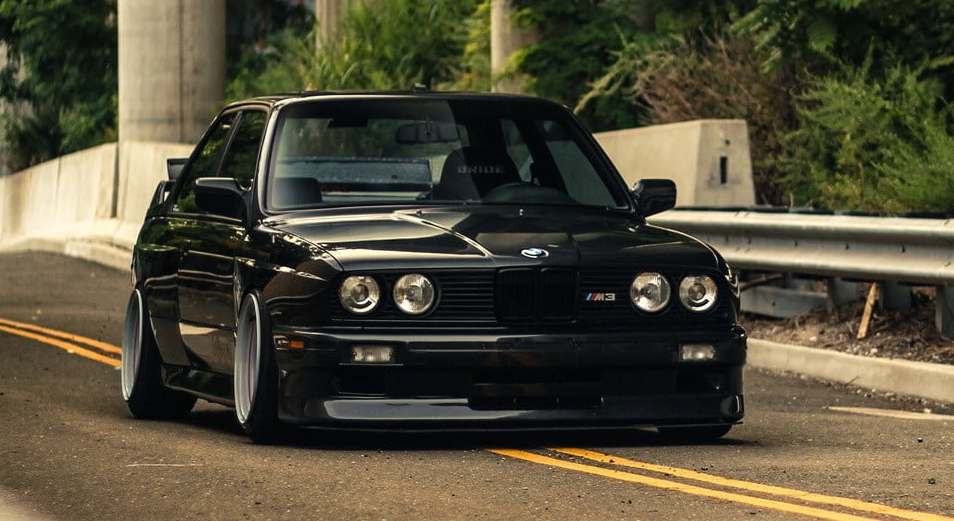


> **Introduction**

This project focuses on predicting the selling price of used
cars using multiple regression models.

**Column Descriptions:**

>**Name :** The name of the car.

>**Make :** The manufacturer or brand of the car.

>**Model :** The specific model or variant of the car.

>**Year :** The year of manufacture or production of the car.


>**Selling Price :** The target variable, representing the selling price of the used car.

>**Km_Driven :** The total distance in kilometers that the car has been driven.

>**Fuel :** The type of fuel used by the car (e.g., petrol, diesel, etc.).

>**Seller_type :** The type of seller(Individual, Dealer, Trustmark Dealer


>**Transmission :** The type of transmission in the car (e.g., automatic, manual).

>**Owner :** The previous ownership category of the car (e.g., first owner, second owner, etc.).

>**Mileage :** The mileage of the car.

>**Engine_CC (Cubic Centimeters) :** The engine displacement, which indicates the engine's size and capacity.

>**Power_bhp (Brake Horsepower) :** The power output of the car's engine in brake horsepower.

>**Torque_kgm (Kilograms per Meter) :** The engine's torque, which represents its rotational force.

>**Seats :** The number of seats in the car, indicating its seating capacity.

* The goal of this project is to build a predictive model that can estimate the selling price of a used car based on these features, allowing potential buyers and sellers to make more informed decisions in the used car market.

>**Source : Kaggle**

> [Vehicle Dataset](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)

>[Kaggle Notebook](https://www.kaggle.com/code/junaidc/car-details-v3)

># **Loading**

In [475]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [476]:
df = pd.read_csv('/content/Car details v3.csv')


># **Dataset Info**

In [477]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [479]:
df.shape

(8128, 13)

In [480]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [481]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

>**Value counts of each columns and their unique values**

In [482]:
for column_name in df.columns:
  print('\n\n\n',df[column_name].value_counts())
  print('unique_values_count = ',df[column_name].nunique(),'\n\n\n','-'*80)




 Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64
unique_values_count =  2058 


 --------------------------------------------------------------------------------



 2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2

># **Data Preprocessing**

>**Changing column name**

In [483]:
column_name = {
    'engine': 'engine_CC',
    'max_power': 'power_bhp',
    'torque': 'torque_kgm'
}

df.rename(columns=column_name, inplace=True)

>**Dropping duplicates**

In [484]:
df.drop_duplicates(inplace=True)

>**Dropping unnecessary columns**

In [485]:
df.drop(['seller_type', 'owner', 'mileage'], axis=1, inplace=True)

>**Replacing the strings associated with values**

In [486]:
df['engine_CC'] = df['engine_CC'].str.replace('CC','')

>**Removing all string values from power_bhp column with regular expression**

In [487]:
import re
def remove_string(text):
  numeric_value = re.sub(r'[^0-9.]','',text)
  return numeric_value


df['power_bhp'] = df['power_bhp'].astype(str).apply(remove_string)
df = df.loc[df['power_bhp'].str.strip() != ''].copy()
df.reset_index(drop=True, inplace=True)

In [488]:
df['torque_kgm'] = df['torque_kgm'].str.replace('at','@')
df['torque_kgm'] = df['torque_kgm'].str.replace(' ','')
df['torque_kgm'] = df['torque_kgm'].str.split('@').str[0]
df['torque_kgm'] = df['torque_kgm'].str.split('(').str[0]
df['torque_kgm'] = df['torque_kgm'].str.split('/').str[0]

In [489]:
df['torque_kgm'] = df['torque_kgm']\
                   .apply(lambda x: str(float(x[:-2]) * 0.101972) + "kgm" \
                          if isinstance(x, str) and x.lower().endswith("nm") \
                          else x)
df['torque_kgm'] = df['torque_kgm'].str.lower().str.replace('kgm','')

>**Converting datatypes**

In [490]:
df['engine_CC'] = df['engine_CC'].astype(float)
df['torque_kgm'] = df['torque_kgm'].astype(float)
df['power_bhp'] = df['power_bhp'].astype(float)

In [491]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
transmission      object
engine_CC        float64
power_bhp        float64
torque_kgm       float64
seats            float64
dtype: object

># **Visualisation**


In [492]:
df.describe()
# extreme values may give outlier indication

,year,selling_price,km_driven,engine_CC,power_bhp,torque_kgm,seats
count,6720.000000,6.720000e+03,6.720000e+03,6717.000000,6720.000000,6717.000000,6717.000000
mean,2013.611012,5.263049e+05,7.339663e+04,1430.985857,87.726919,18.138611,5.434271
std,3.896930,5.234604e+05,5.869223e+04,493.469198,31.771619,14.231930,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,624.000000,0.000000,4.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,1197.000000,67.100000,11.300000,5.000000
50%,2014.000000,4.200000e+05,6.822150e+04,1248.000000,81.830000,16.315520,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,1498.000000,100.000000,20.400000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3604.000000,400.000000,510.000000,14.000000


>**Count plot**

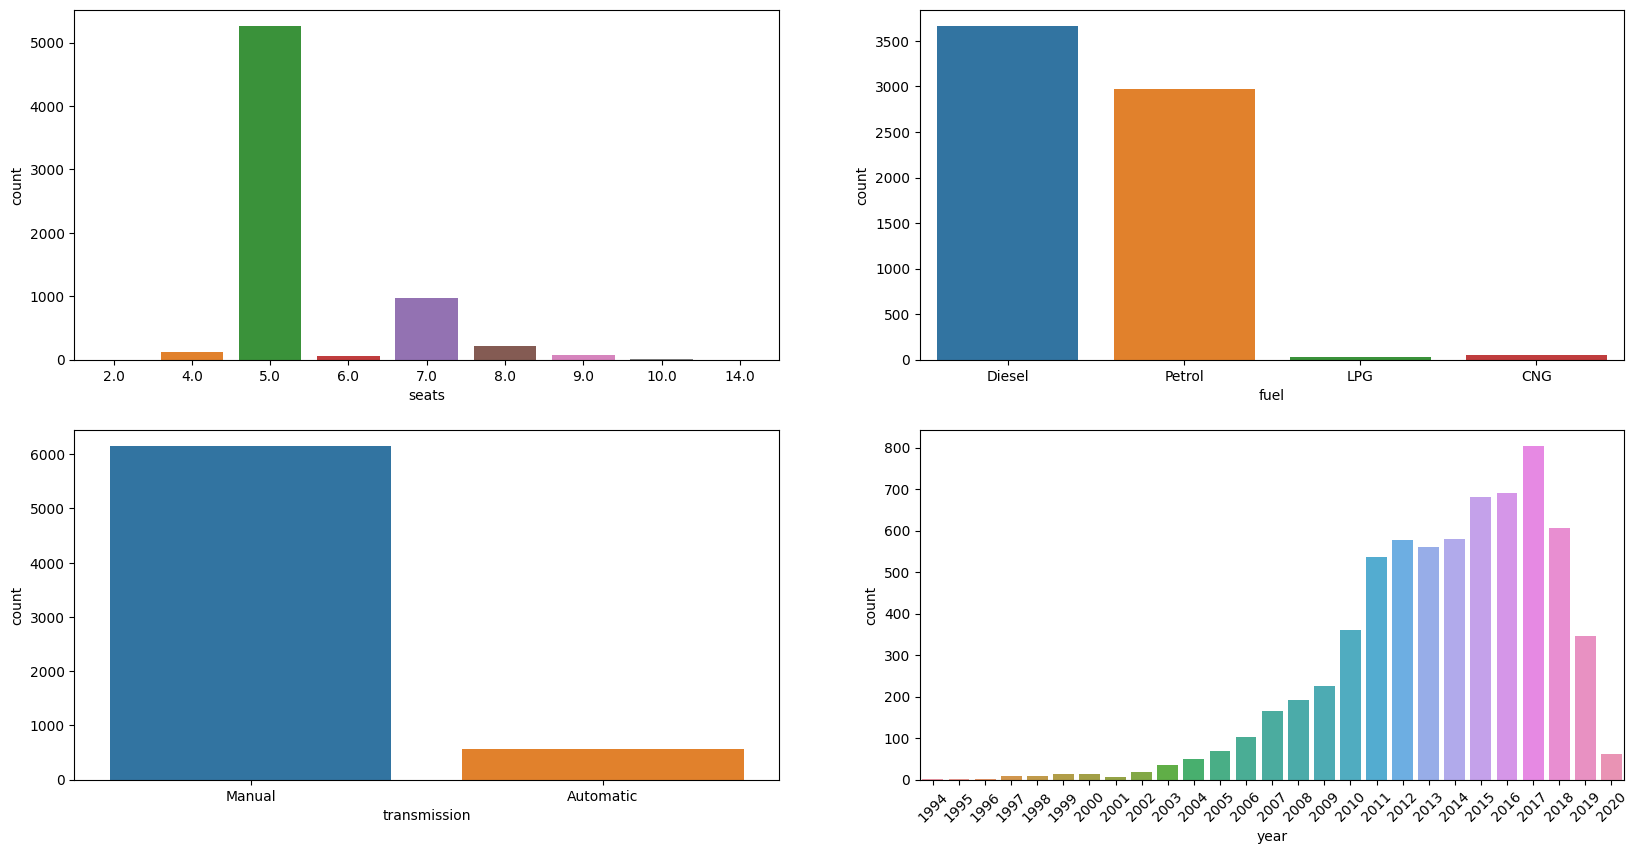

In [493]:
import seaborn as sns
import matplotlib.pyplot as plt


necessary_cols = ['year', 'seats', 'fuel', 'transmission']
fig,ax=plt.subplots(2,2,figsize=(20,10))
sns.countplot(x='seats',data=df,ax=ax[0,0])
sns.countplot(x='fuel',data=df,ax=ax[0,1])
sns.countplot(x='transmission',data=df,ax=ax[1,0])
sns.countplot(x='year',data=df,ax=ax[1,1])
plt.xticks(rotation=45)
plt.show()

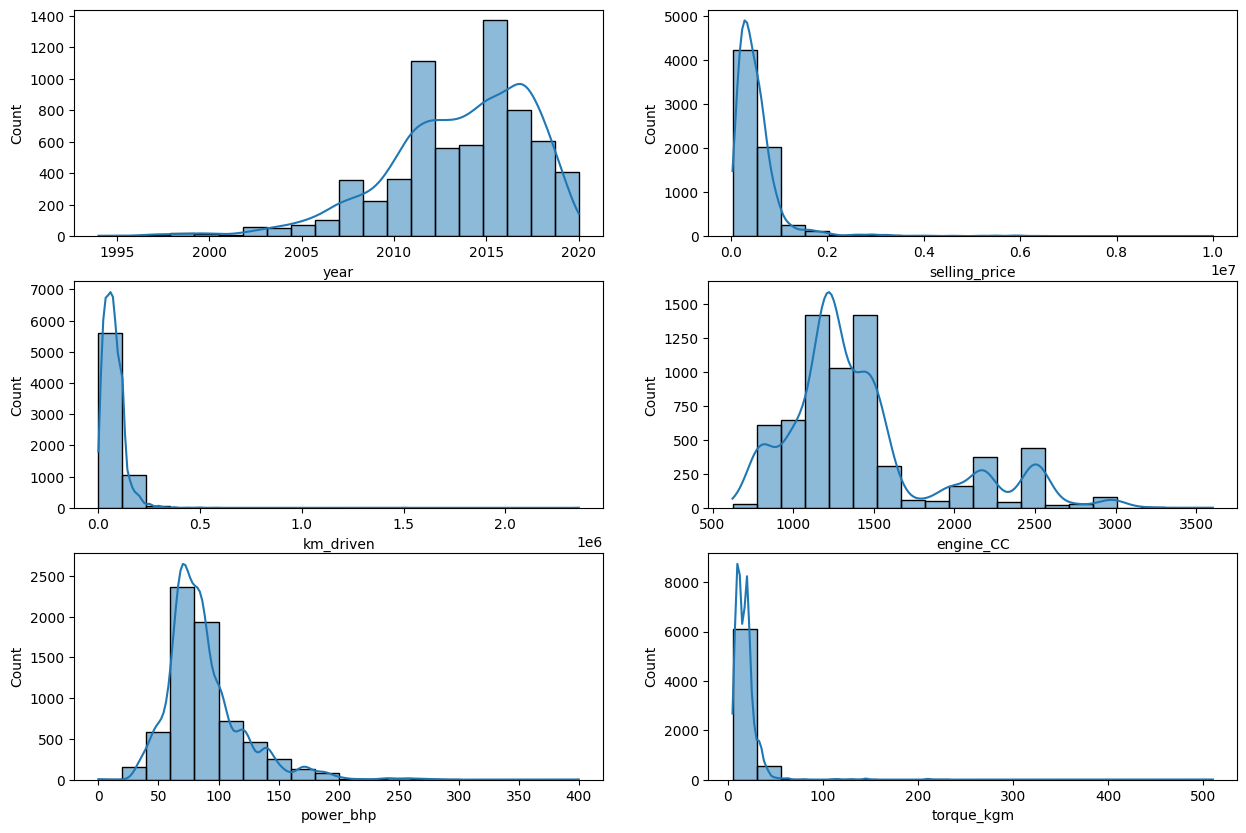

In [494]:
fig,ax=plt.subplots(3,2,figsize=(15,10))
sns.histplot(x='year',bins=20, data=df,ax=ax[0,0],kde=True)
sns.histplot(x='selling_price',bins=20, data=df,ax=ax[0,1],kde=True)
sns.histplot(x='km_driven',bins=20, data=df,ax=ax[1,0],kde=True)
sns.histplot(x='engine_CC',bins=20, data=df,ax=ax[1,1],kde=True)
sns.histplot(x='power_bhp',bins=20, data=df,ax=ax[2,0],kde=True)
sns.histplot(x='torque_kgm',bins=20, data=df,ax=ax[2,1],kde=True)
plt.show()

>**Outlier detection by ploting box plot**

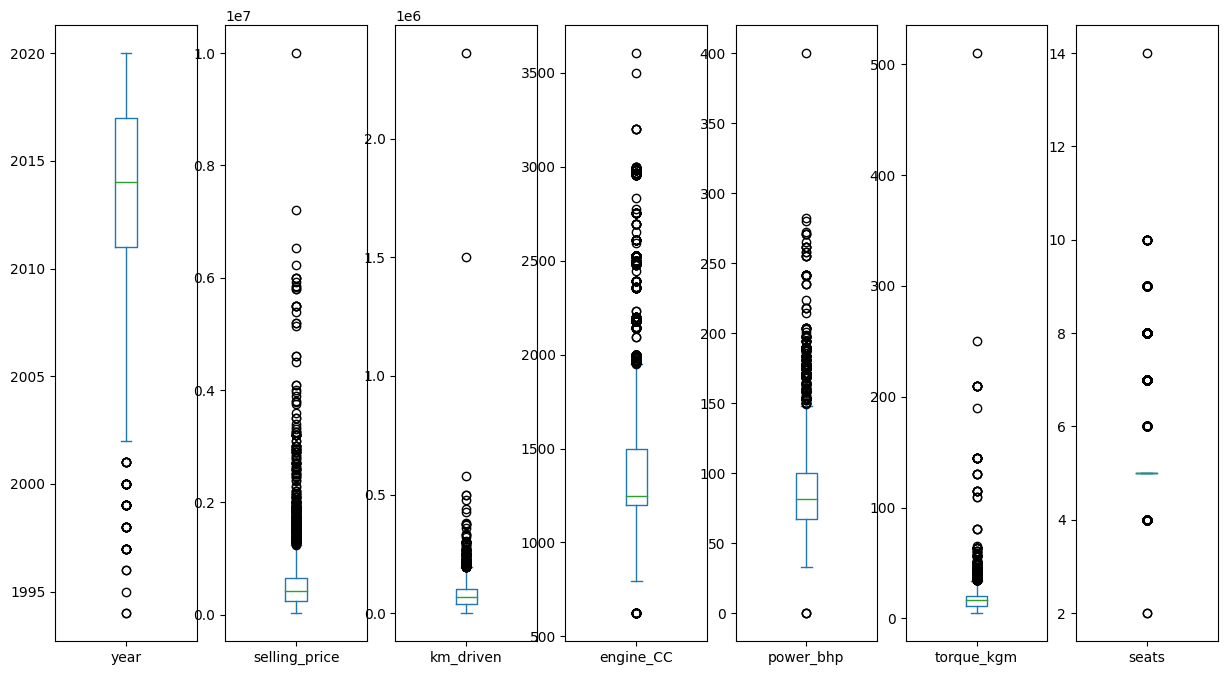

In [495]:
numerical_col = ['year','selling_price','km_driven','engine_CC','power_bhp',\
                 'torque_kgm','seats']
df[numerical_col].plot(kind='box',subplots=True,figsize=(15,8))
plt.show()

>**Lineplot**

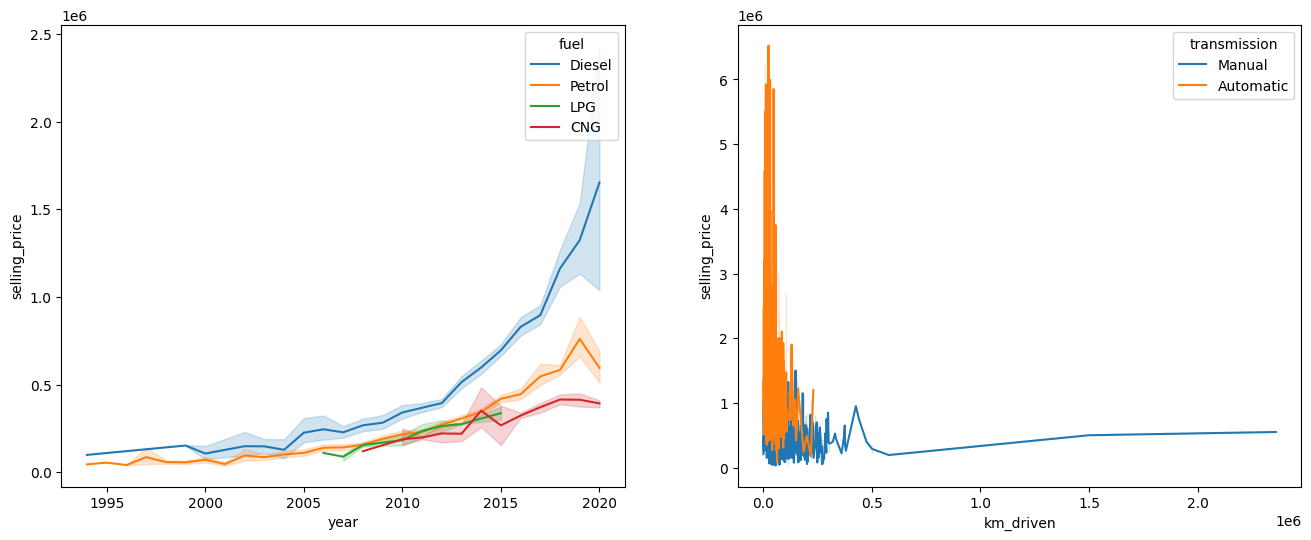

In [496]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
sns.lineplot(x= 'year',y= 'selling_price',data = df, hue = 'fuel',ax = ax[0])
sns.lineplot(x= 'km_driven', y = 'selling_price', data = df, hue ='transmission', ax = ax[1])
plt.show()

>**Regression line of each column**

<Figure size 1500x700 with 0 Axes>

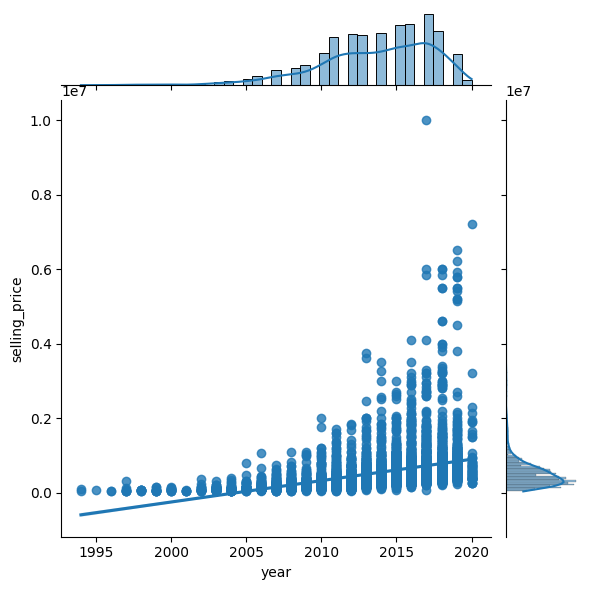

In [497]:
plt.figure(figsize=(15, 7))
sns.jointplot(x='year',y = 'selling_price', data = df, kind = 'reg')
plt.show()

<Figure size 1500x700 with 0 Axes>

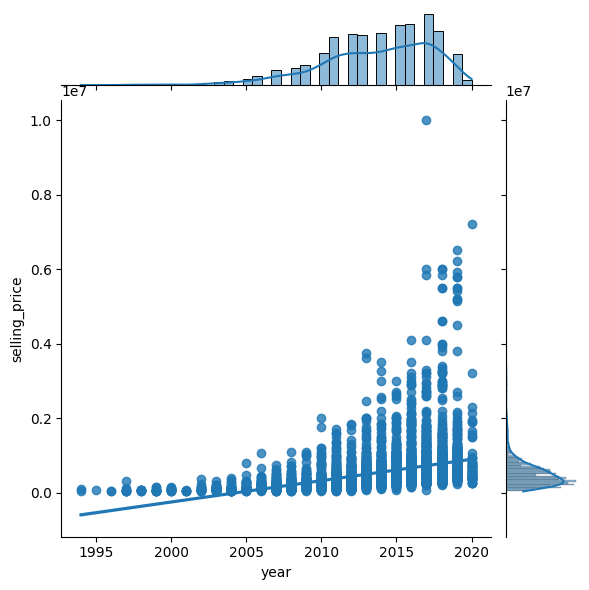

In [498]:
plt.figure(figsize=(15, 7))
sns.jointplot(x='year',y = 'selling_price', data = df, kind = 'reg')
plt.show()

<Figure size 1500x700 with 0 Axes>

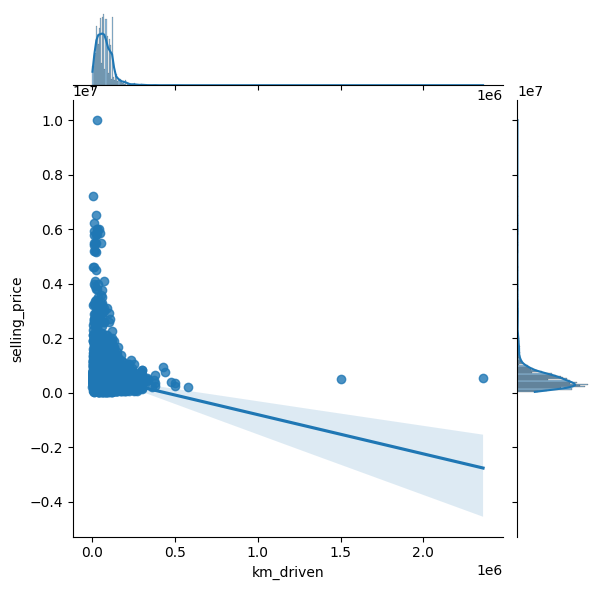

In [499]:
plt.figure(figsize=(15, 7))
sns.jointplot(x='km_driven',y = 'selling_price', data = df, kind = 'reg')
plt.show()

<Figure size 1500x700 with 0 Axes>

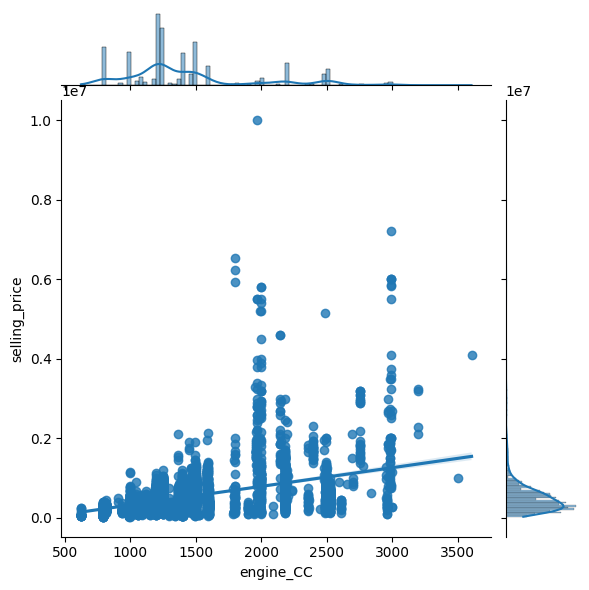

In [500]:
plt.figure(figsize=(15, 7))
sns.jointplot(x='engine_CC',y = 'selling_price', data = df, kind = 'reg')
plt.show()

<Figure size 1500x700 with 0 Axes>

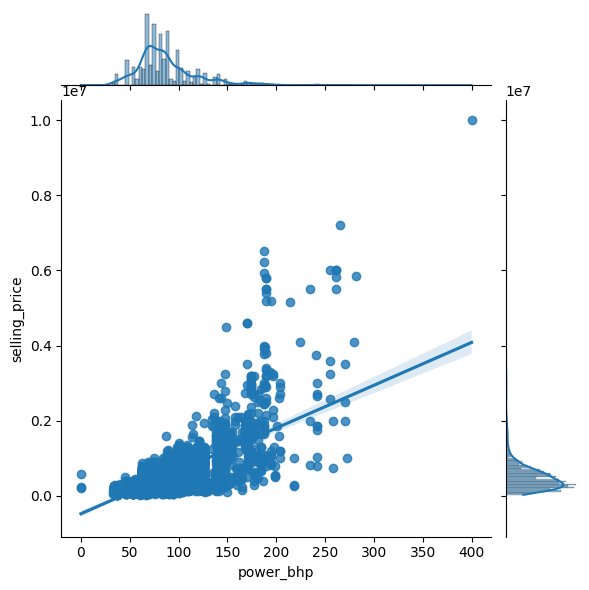

In [501]:
plt.figure(figsize=(15, 7))
sns.jointplot(x='power_bhp',y = 'selling_price', data = df, kind = 'reg')
plt.show()

<Figure size 1500x700 with 0 Axes>

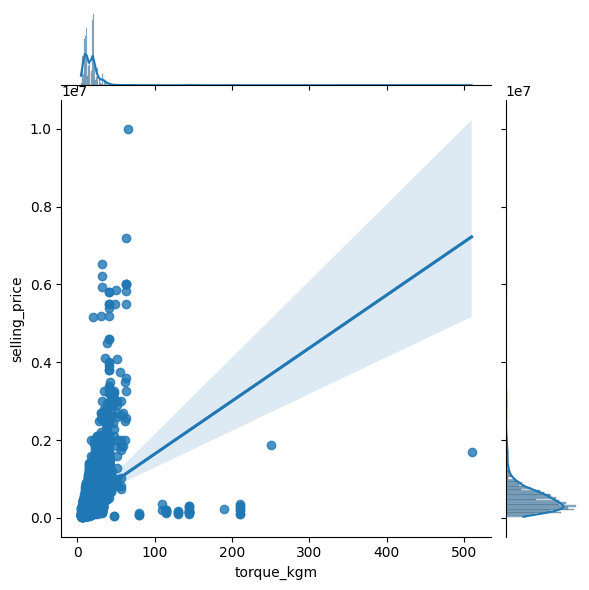

In [502]:
plt.figure(figsize=(15, 7))
sns.jointplot(x='torque_kgm',y = 'selling_price', data = df, kind = 'reg')
plt.show()

<Figure size 1500x700 with 0 Axes>

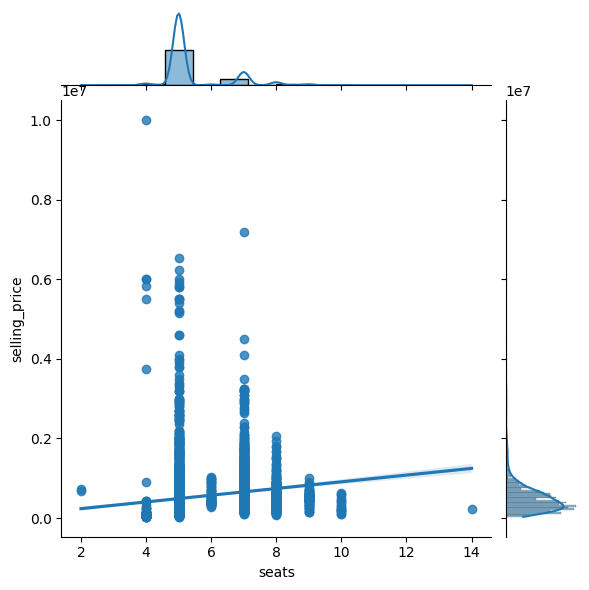

In [503]:
plt.figure(figsize=(15, 7))
sns.jointplot(x='seats',y = 'selling_price', data = df, kind = 'reg')
plt.show()

>**Correlation and Heatmap**

In [504]:
df.corr()

,year,selling_price,km_driven,engine_CC,power_bhp,torque_kgm,seats
year,1.000000,0.427380,-0.387973,-0.019763,0.159688,0.015031,0.025021
selling_price,0.427380,1.000000,-0.161293,0.442772,0.691536,0.369959,0.158531
km_driven,-0.387973,-0.161293,1.000000,0.253460,0.041777,0.119582,0.207890
engine_CC,-0.019763,0.442772,0.253460,1.000000,0.683506,0.492732,0.658711
power_bhp,0.159688,0.691536,0.041777,0.683506,1.000000,0.520331,0.259028
torque_kgm,0.015031,0.369959,0.119582,0.492732,0.520331,1.000000,0.238618
seats,0.025021,0.158531,0.207890,0.658711,0.259028,0.238618,1.000000


<Axes: >

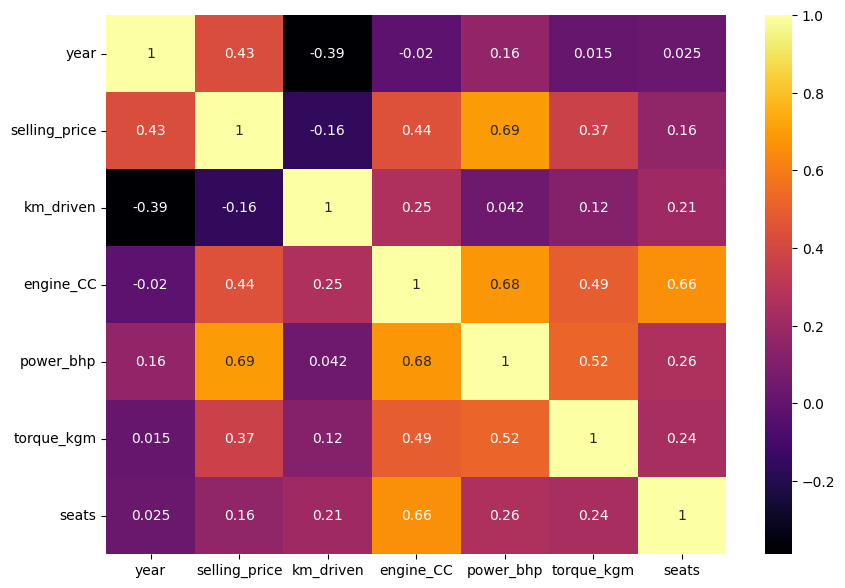

In [505]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),cmap='inferno',annot=True)

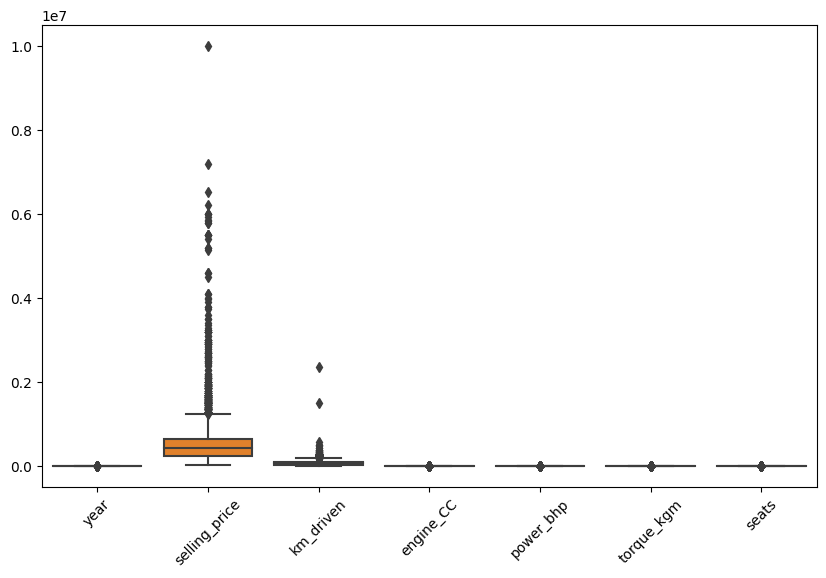

In [506]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

># **Filling Missing Values**

>**Checking skew values**

In [507]:
lst = ['engine_CC','power_bhp','torque_kgm']
for i in lst:
  print(i,'skewness   : ', df[i].skew())

engine_CC skewness   :  1.2157308984520214
power_bhp skewness   :  1.6972585962276057
torque_kgm skewness   :  11.514951568764804




   
>*for skewness positive/negative use median,*

>*for skewness symmetric use median or mean and*

>*for categorical use mode*



>**Filling Missing Values**

In [508]:
df['engine_CC'] = df['engine_CC'].fillna(df['engine_CC'].median())
df['torque_kgm'] = df['torque_kgm'].fillna(df['torque_kgm'].median())
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

In [509]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
engine_CC        0
power_bhp        0
torque_kgm       0
seats            0
dtype: int64

># **Feature Engineering**



>**Transforming name column into make**



In [510]:
df['make'] = df['name'].str.split(' ', 1, expand=True)[0].str.title()
df.drop('name', axis=1, inplace=True)
df

,year,selling_price,km_driven,fuel,transmission,engine_CC,power_bhp,torque_kgm,seats,make
0,2014,450000,145500,Diesel,Manual,1248.0,74.00,19.374680,5.0,Maruti
1,2014,370000,120000,Diesel,Manual,1498.0,103.52,25.493000,5.0,Skoda
2,2006,158000,140000,Petrol,Manual,1497.0,78.00,12.700000,5.0,Honda
3,2010,225000,127000,Diesel,Manual,1396.0,90.00,22.400000,5.0,Hyundai
4,2007,130000,120000,Petrol,Manual,1298.0,88.20,11.500000,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...
6715,2013,260000,50000,Petrol,Manual,998.0,67.10,9.177480,5.0,Maruti
6716,2014,475000,80000,Diesel,Manual,1396.0,88.73,22.403248,5.0,Hyundai
6717,2013,320000,110000,Petrol,Manual,1197.0,82.85,11.594216,5.0,Hyundai
6718,2007,135000,119000,Diesel,Manual,1493.0,110.00,24.000000,5.0,Hyundai




>**Creating a new age column from year column**


In [511]:
df = df.copy()
df['age'] = 2023 - df['year']

>**Converting highly skewed data using log transformation**


>* *we can see the datas in selling_price, km_driven & torque are highly skewed Logarithmic scaling can help make the data more normally distributed*





In [512]:
for i in numerical_col:
  print(i,'skewness   : ', df[i].skew())

year skewness   :  -0.9312547489396726
selling_price skewness   :  5.571554488486051
km_driven skewness   :  11.917661854202112
engine_CC skewness   :  1.2163643457730218
power_bhp skewness   :  1.6972585962276057
torque_kgm skewness   :  11.517565716563
seats skewness   :  1.9200460352104987




>*    *logarithmic transformation can improve model performance by making*
 *the relationships between features and the target more linear.*



In [513]:
log_transform = ['km_driven','engine_CC','power_bhp','torque_kgm','seats','age']
df[log_transform] = np.log(df[log_transform])

In [514]:
df

,year,selling_price,km_driven,fuel,transmission,engine_CC,power_bhp,torque_kgm,seats,make,age
0,2014,450000,11.887931,Diesel,Manual,7.129298,4.304065,2.963967,1.609438,Maruti,2.197225
1,2014,370000,11.695247,Diesel,Manual,7.311886,4.639765,3.238404,1.609438,Skoda,2.197225
2,2006,158000,11.849398,Petrol,Manual,7.311218,4.356709,2.541602,1.609438,Honda,2.833213
3,2010,225000,11.751942,Diesel,Manual,7.241366,4.499810,3.109061,1.609438,Hyundai,2.564949
4,2007,130000,11.695247,Petrol,Manual,7.168580,4.479607,2.442347,1.609438,Maruti,2.772589
...,...,...,...,...,...,...,...,...,...,...,...
6715,2013,260000,10.819778,Petrol,Manual,6.905753,4.206184,2.216753,1.609438,Maruti,2.302585
6716,2014,475000,11.289782,Diesel,Manual,7.241366,4.485598,3.109206,1.609438,Hyundai,2.197225
6717,2013,320000,11.608236,Petrol,Manual,7.087574,4.417032,2.450506,1.609438,Hyundai,2.302585
6718,2007,135000,11.686879,Diesel,Manual,7.308543,4.700480,3.178054,1.609438,Hyundai,2.772589


>**Visualisation of both make and year column**

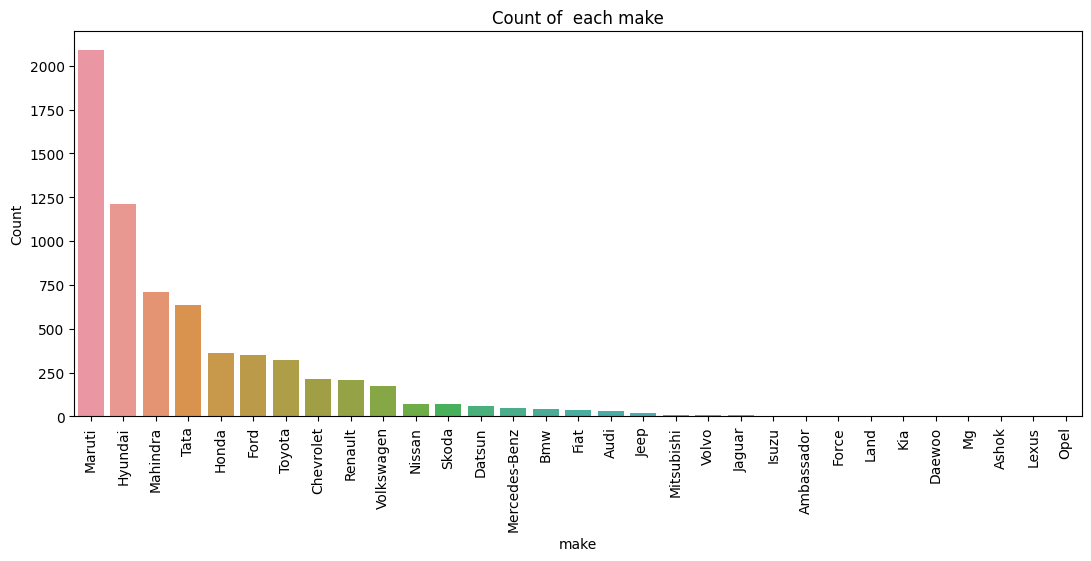

In [515]:
plt.figure(figsize=(13, 5))
sns.barplot(x = df['make'].value_counts().index, y = df['make'].value_counts(), data = df)
plt.xlabel('make')
plt.ylabel('Count')
plt.title(f'Count of  each make')
plt.xticks(rotation=90)
plt.show()

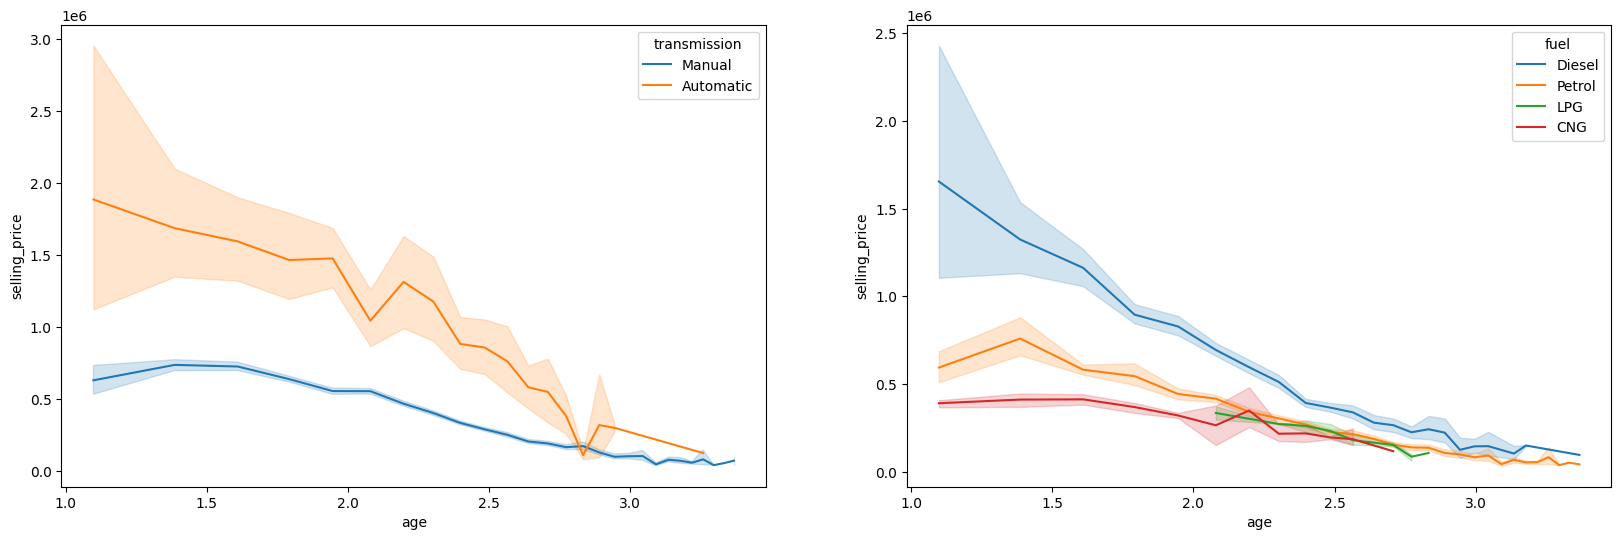

In [516]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x= 'age',y= 'selling_price',hue = 'transmission',data = df,ax = ax[0])
sns.lineplot(x= 'age', y = 'selling_price', data = df, hue ='fuel', ax = ax[1])
plt.show()

># **Outlier handling**

>**Replacing outliers with upper iqr and lower iqr**




In [517]:
columns = ['engine_CC', 'seats','selling_price','torque_kgm']

for column_name in columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)

    df = df[(df[column_name] >= lower) & (df[column_name] <= upper)]

df.reset_index(drop=True, inplace=True)

>**Removing outliers**

In [518]:
columns = ['year', 'km_driven', 'engine_CC', 'power_bhp', 'torque_kgm', \
           'seats','age','selling_price']

for column_name in columns:
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  lower = Q1 - (IQR * 1.5)
  upper = Q3 + (IQR * 1.5)

  df.loc[df[column_name] < lower, column_name] = lower

  df.loc[df[column_name] > upper, column_name] = upper

  # df.loc[(df[column_name] < lower) | \
  #  (df[column_name] > upper), column_name] = df[column_name].mean()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'year'),
  Text(1, 0, 'selling_price'),
  Text(2, 0, 'km_driven'),
  Text(3, 0, 'engine_CC'),
  Text(4, 0, 'power_bhp'),
  Text(5, 0, 'torque_kgm'),
  Text(6, 0, 'seats'),
  Text(7, 0, 'age')])

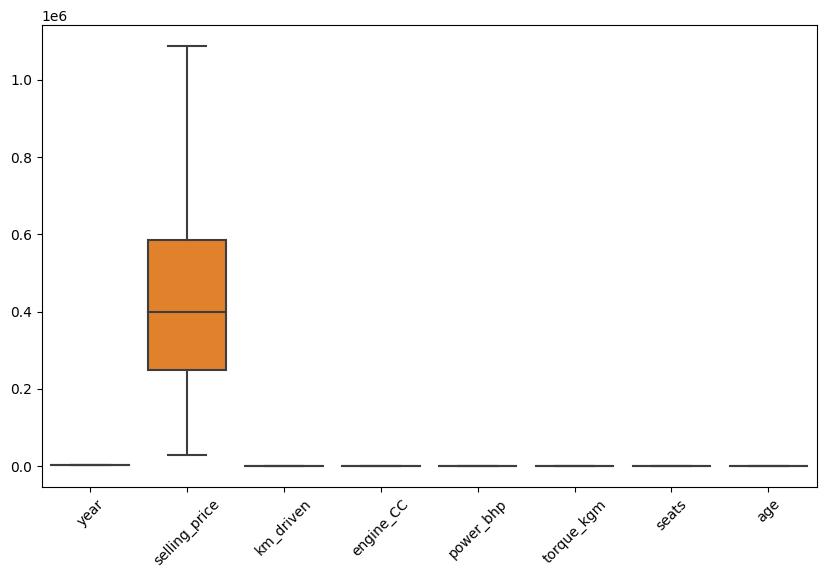

In [519]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.xticks(rotation=45)

># **Encoding using get_dummies**

> **We can also use Onehot encoding**
* from sklearn.preprocessing import OneHotEncoder
* encoder = OneHotEncoder(sparse=False, drop='first')
* encoded_data = encoder.fit_transform(df[['make','fuel','transmission']])

In [520]:
encoded_data = pd.get_dummies(df[['make','fuel','transmission']] ,drop_first = True)

* *onehot / get_dummies for ordinal relation*
* *label for nominal relation*

*Concatenate numpy array with existing DataFrame*

In [521]:
panda_df = pd.DataFrame(encoded_data)
df2 = pd.concat([df,panda_df],axis = 1)
df2

,year,selling_price,km_driven,fuel,transmission,engine_CC,power_bhp,torque_kgm,seats,make,...,make_Opel,make_Renault,make_Skoda,make_Tata,make_Toyota,make_Volkswagen,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual
0,2014,450000,11.887931,Diesel,Manual,7.129298,4.304065,2.963967,1.609438,Maruti,...,0,0,0,0,0,0,1,0,0,1
1,2014,370000,11.695247,Diesel,Manual,7.311886,4.639765,3.238404,1.609438,Skoda,...,0,0,1,0,0,0,1,0,0,1
2,2006,158000,11.849398,Petrol,Manual,7.311218,4.356709,2.541602,1.609438,Honda,...,0,0,0,0,0,0,0,0,1,1
3,2010,225000,11.751942,Diesel,Manual,7.241366,4.499810,3.109061,1.609438,Hyundai,...,0,0,0,0,0,0,1,0,0,1
4,2007,130000,11.695247,Petrol,Manual,7.168580,4.479607,2.442347,1.609438,Maruti,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,2013,260000,10.819778,Petrol,Manual,6.905753,4.206184,2.216753,1.609438,Maruti,...,0,0,0,0,0,0,0,0,1,1
4483,2014,475000,11.289782,Diesel,Manual,7.241366,4.485598,3.109206,1.609438,Hyundai,...,0,0,0,0,0,0,1,0,0,1
4484,2013,320000,11.608236,Petrol,Manual,7.087574,4.417032,2.450506,1.609438,Hyundai,...,0,0,0,0,0,0,0,0,1,1
4485,2007,135000,11.686879,Diesel,Manual,7.308543,4.700480,3.178054,1.609438,Hyundai,...,0,0,0,0,0,0,1,0,0,1


>**Dropping Encoded Columns**

In [522]:
df2.drop(['make','fuel','transmission'],axis = 1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4487 entries, 0 to 4486
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 4487 non-null   int64  
 1   selling_price        4487 non-null   int64  
 2   km_driven            4487 non-null   float64
 3   engine_CC            4487 non-null   float64
 4   power_bhp            4487 non-null   float64
 5   torque_kgm           4487 non-null   float64
 6   seats                4487 non-null   float64
 7   age                  4487 non-null   float64
 8   make_Audi            4487 non-null   uint8  
 9   make_Bmw             4487 non-null   uint8  
 10  make_Chevrolet       4487 non-null   uint8  
 11  make_Datsun          4487 non-null   uint8  
 12  make_Fiat            4487 non-null   uint8  
 13  make_Ford            4487 non-null   uint8  
 14  make_Honda           4487 non-null   uint8  
 15  make_Hyundai         4487 non-null   u

># **Seperating x and y**

In [523]:
x = df2.drop(['selling_price'], axis=1)
y = df2['selling_price']

># **Feature Selection using f_regression**

* *For regression problems with continuous target variables, F-regression is more appropriate.*
* *For classification problems with categorical target variables, Chi-square is suitable.*

In [524]:
from sklearn.feature_selection import SelectKBest, f_regression

feature_selector = SelectKBest(f_regression, k = 6)
X_selected = feature_selector.fit_transform(x, y)

column_indices = feature_selector.get_support(indices=True)

print('best columns : ', df2.columns[column_indices])

best columns :  Index(['year', 'selling_price', 'km_driven', 'engine_CC', 'power_bhp',
       'seats'],
      dtype='object')


In [526]:
df3 = df2.iloc[:, column_indices]
df3

,year,selling_price,km_driven,engine_CC,power_bhp,seats
0,2014,450000,11.887931,7.129298,4.304065,1.609438
1,2014,370000,11.695247,7.311886,4.639765,1.609438
2,2006,158000,11.849398,7.311218,4.356709,1.609438
3,2010,225000,11.751942,7.241366,4.499810,1.609438
4,2007,130000,11.695247,7.168580,4.479607,1.609438
...,...,...,...,...,...,...
4482,2013,260000,10.819778,6.905753,4.206184,1.609438
4483,2014,475000,11.289782,7.241366,4.485598,1.609438
4484,2013,320000,11.608236,7.087574,4.417032,1.609438
4485,2007,135000,11.686879,7.308543,4.700480,1.609438


># **Train_test_split**

In [527]:
x = df3.drop(['selling_price'], axis=1)
y = df3['selling_price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, \
                                                    random_state = 42)

># **Standardisation**

In [528]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

># **Model selection :**










># **Linear Regression**

In [529]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

>**Hyperparameter Tuning for Linear Regression**

In [530]:
from sklearn.model_selection import GridSearchCV

param_lr={'copy_X': [True,False],
           'fit_intercept': [True,False],
           'n_jobs': [None,1,5,7,6],
           'positive':[True, False]}
gsv = GridSearchCV(linear, param_lr, cv = 5, scoring= 'neg_mean_squared_error')
gsv.fit(x_train,y_train)
print(gsv.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


>**Model Creation**

In [531]:
linear = LinearRegression(copy_X= True, fit_intercept= True,\
                          n_jobs = None, positive = False)

linear.fit(x_train,y_train)
y_pred1 = linear.predict(x_test)

linear_df = pd.DataFrame({'Actual': y_test,
                          'Predicted': y_pred1,
                          'difference': y_test-y_pred1})
linear_df

,Actual,Predicted,difference
157,200000,213638.204500,-13638.204500
2992,540000,649343.372260,-109343.372260
1018,270000,501839.706204,-231839.706204
3466,204999,259801.452439,-54802.452439
731,170000,201102.426105,-31102.426105
...,...,...,...
1157,500000,475488.041042,24511.958958
3850,500000,630029.817399,-130029.817399
4211,110000,114297.607568,-4297.607568
2019,240000,273894.891535,-33894.891535


>**Model Evaluation for Linear Regression**

In [532]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error,\
mean_squared_error

r1 = r2_score(y_test,y_pred1)
MAPE1 = mean_absolute_percentage_error(y_pred1, y_test)
print('r2 score : ',r1)
print('MAPE : ',MAPE1)

r2 score :  0.7150861211791812
MAPE :  0.3261634384022606


In [533]:
print('slope : ',list(zip(column_indices,linear.coef_)))

slope :  [(0, 151315.97508940133), (1, -14660.631653961529), (2, 31895.617219694464), (3, 68330.32710894813), (4, 0.0)]


In [534]:
print('intercept :', linear.intercept_)

intercept : 432553.2607968822


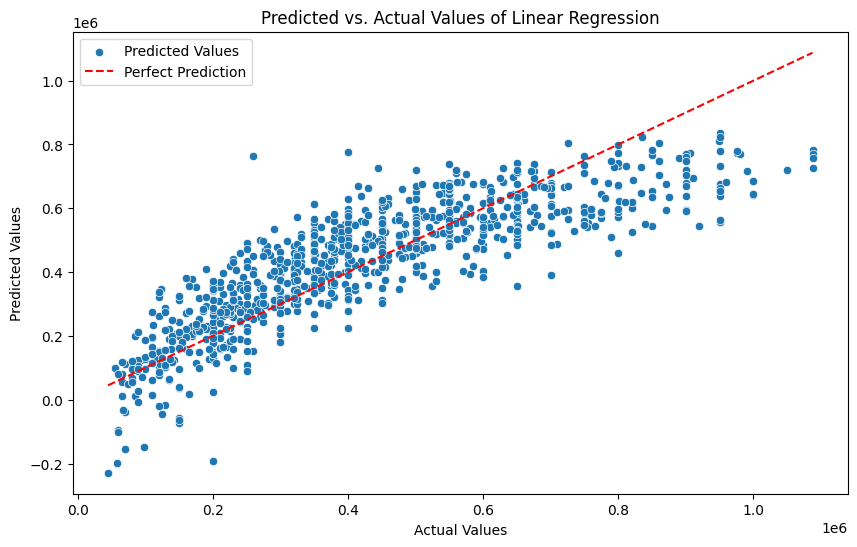

In [535]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred1, label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--',\
         color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values of Linear Regression')
plt.legend()
plt.show()

># **Decision Tree Regressor**

In [536]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

>**Hyperparameter Tuning for Decision Tree**

In [537]:
param_dt={'max_depth':[2,4,6,8],
          'max_features':['auto','sqrt','log2'],
          'splitter':['best','random'],
          'min_samples_leaf':[1,2,3,4]}


gsv=GridSearchCV(dec_tree, param_dt, cv=5, scoring= 'neg_mean_squared_error')
gsv.fit(x_train,y_train)

print(gsv.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'splitter': 'best'}


>**Model Creation**

In [538]:
dec_tree = DecisionTreeRegressor(max_depth = 8, max_features = 'auto', \
                                 min_samples_leaf = 4, splitter = 'best')

dec_tree.fit(x_train, y_train)

y_pred2 = dec_tree.predict(x_test)

>**Model Evaluation of Decision Tree Regressor**

In [539]:
r2 = r2_score(y_test, y_pred2)
MAPE2 = mean_absolute_percentage_error(y_pred2, y_test)
print('r2 score : ', r2)
print('MAPE : ',MAPE2 )

r2 score :  0.7974125701325119
MAPE :  0.2092809625559216


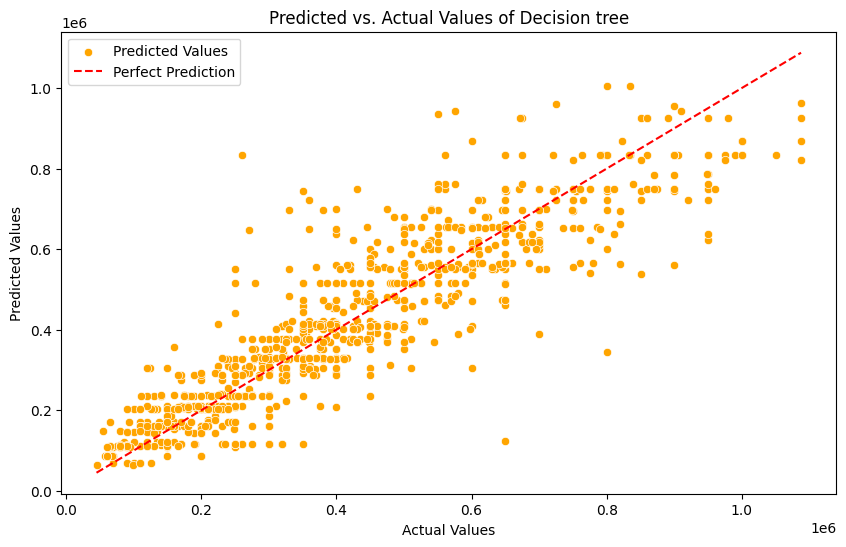

In [540]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred2, c='orange', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--',\
         color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values of Decision tree')
plt.legend()
plt.show()

># **Random Forest**

In [541]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

>**Hyperparameter Tuning for Random Forest**

In [542]:
param_rf={'n_estimators':[10,15,125,8,85],
          'max_depth':[10,25,42,3,85]}

gsv2=GridSearchCV(random_forest, param_rf,cv=5,scoring= 'neg_mean_squared_error')
gsv2.fit(x_train,y_train)

print(gsv2.best_params_)

{'max_depth': 10, 'n_estimators': 125}


>**Model Creation**

In [543]:
random_forest = RandomForestRegressor(max_depth = 10, n_estimators = 85)
random_forest.fit(x_train, y_train)

y_pred3 = random_forest.predict(x_test)

>**Model Evaluation of Random Forest**

In [544]:
r3 = r2_score(y_test, y_pred3)
MAPE3 = mean_absolute_percentage_error(y_pred3, y_test)
print('r2 score : ', r3)
print('MAPE : ',MAPE3 )

r2 score :  0.8218182867152813
MAPE :  0.1792996056579779


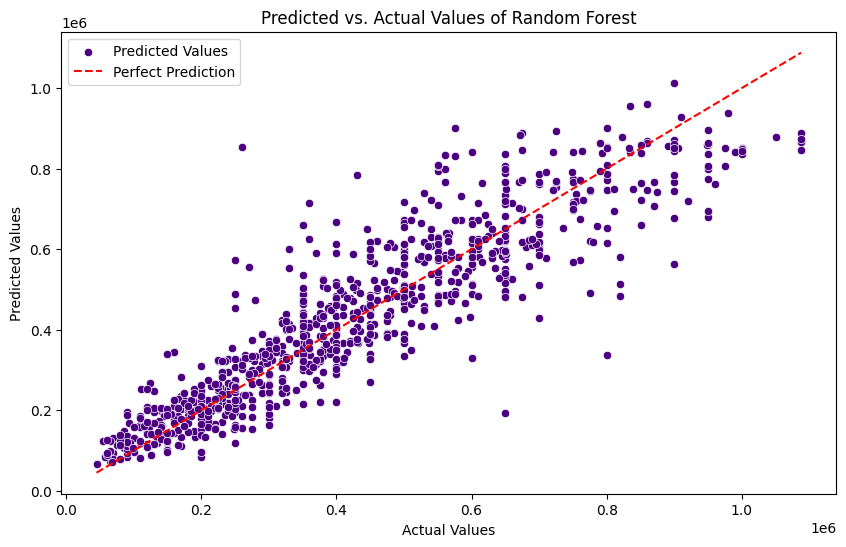

In [545]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred3, c='indigo', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--',\
         color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values of Random Forest')
plt.legend()
plt.show()

># **Accuracy Comparison b/w Models**

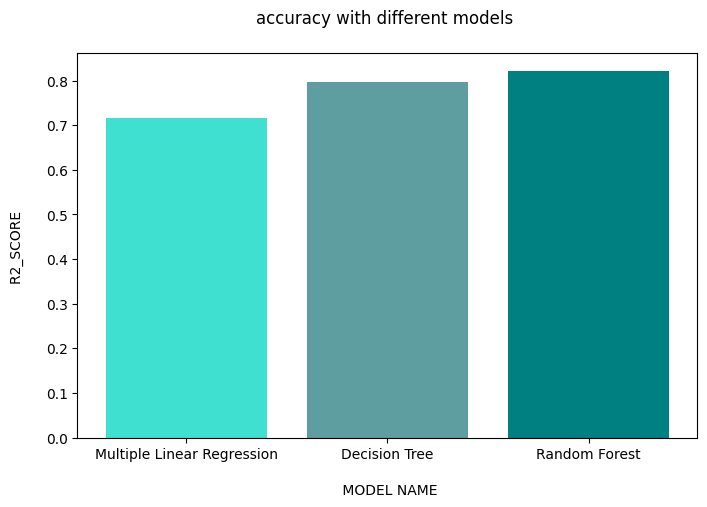

In [546]:
models = ['Multiple Linear Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(8, 5))
result = [r1, r2, r3]
plt.bar(models, result, color=['Turquoise', 'cadetblue', 'teal' ])
plt.xlabel('\n MODEL NAME')
plt.ylabel('R2_SCORE \n')
plt.title('accuracy with different models \n')
plt.show()

># **Predicting with the model**

In [547]:
year = int(input('Enter the year   (1983 - 2017)                        :'))
km_driven = float(input('Enter the kilometer driven                     :'))
engine_CC = float(input('Enter the engine cubic capacity (600 - 3600)   :'))
power_bhp = float(input('Enter the power in brake horsepower (0 - 400)  :'))
seats = float(input('Enter the count of seats (2 - 14)                  :'))

Enter the year   (1983 - 2017)                        :2008
Enter the kilometer driven                     :150000
Enter the engine cubic capacity (600 - 3600)   :2000
Enter the power in brake horsepower (0 - 400)  :260
Enter the count of seats (2 - 14)                  :6


In [548]:
input_features = [year, km_driven, engine_CC, power_bhp, seats]
models = [dec_tree,random_forest]
for i in models:

  print(f'Selling Price [with {i}]: ₹', i.predict([input_features]))

Selling Price [with DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4)]: ₹ [1043750.]
Selling Price [with RandomForestRegressor(max_depth=10, n_estimators=85)]: ₹ [967282.9822883]
